# COGS 108: Happy or Healthy?

# Names

- Salma Sheriff
- Mizuki Kadowaki 
- Zoe Lederman 
- Yashaswat Malhotra


# Overview, Question & Background 

COVID-19 has affected every part of the world; however, some countries responded much better than others to the virus. Our group was curious what factors of public well-being might correlate with better COVID-19 outcomes and decided to look into how the levels of happiness in a country might correlate to their COVID-19 response. Performing data analysis on our datasets allowed us to extrapolate that there is a weak positive correlation between the happiness of a country and having a worse COVID-19 outcome.


<a id='research_question'></a>
# Research Question

Does the perceived citizen happiness correlate with COVID-19 outcomes?

We are treating happiness score as the predicting variable and COVID-19 outcomes as the outcome variable. COVID-19 outcomes include confirmed cases, deaths, and recoveries.

# Background & Prior Work
Happiness is a very difficult construct to operationally define. According to Psychology Today one of the ways to try and measure happiness is through Self-Reports. Self-Reports ask questions such as “Looking back at your life as a whole, overall how happy are you?” Rather than truly measuring happiness, questions like this are measuring perceived happiness.
 
The COVID-19 pandemic is an ongoing global pandemic that has affected the lives of people worldwide. The very first sighting of SARS-CoV-2 was in December 2019. It was declared an Emergency of national concern in January 2020, and a pandemic in March 2020. As the virus is airborne, many countries have implemented and enforced social distancing restrictions such as wearing a face mask in public, limiting social gatherings and prohibiting public indoor dining. There have been over 101 million confirmed cases, and over 2.18 million deaths attributed to this pandemic. All of the different countries have reacted differently to this pandemic. Some countries such as New Zealand, Taiwan, Iceland, Singapore, and Vietnam are considered to having the best response to the pandemic, with very swift and effective government responses with cooperative citizen support and compliance. On the other hand, countries such as Brazil, India, the UK, and most prominently, the United States, have reacted poorly, with slow and ineffective government responses and low citizen support.
 
There is a possibility that happiness is related to COVID-19 response. We can take Singapore as a case study. Singapore has scored in the top 40 of the world happiness report in the years 2015–2019. According to sources like Time, Singapore also had a strong response to COVID-19 in the form of implementing contact tracing and delivering stimulus packages. Taking citizens' happiness as an indication of public well-being, we can look at governmental response and citizen cooperation in an adverse situation, in this case COVID-19, to see if there is a correlation between having a responsive, efficient government and public happiness.
 
References: https://www.psychologytoday.com/us/blog/the-happiness-doctor/201705/measuring-happiness-how-can-we-measure-it
https://time.com/5851633/best-global-responses-COVID-19/
https://www.who.int/emergencies/diseases/novel-coronavirus-2019
https://www.movehub.com/blog/best-and-worst-COVID-responses/
 


# Hypothesis
We hypothesize that countries with citizens of high rates of perceived happiness tended to be less impacted by the adverse effects of COVID-19.
 
From what we have seen on the news, it seems that the impact that COVID-19 has on a country is correlated to a combination of the government’s response and the cooperation of the citizens. This leads us to believe that happier citizens are more likely to be satisfied with their government and react more cooperatively to restrictions and rules set to deal with the global pandemic.


# Datasets

We included three kaggle datasets in our project: World Happiness Report, COVID-19 Coronavirus, and Countries population by year 2020. 
 
#### World Happiness Report
The World Happiness dataset ranked 156 countries based on their happiness scores from 2015–2019. The happiness scores are summations of six factors—economic production, social support, life expectancy, freedom, absence of corruption, and generosity—as they contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. Sourced from kaggle: https://www.kaggle.com/unsdsn/world-happiness.
 
#### COVID-19 Coronavirus Complete Dataset
The COVID-19 dataset tracks six values for 194 countries and cruise ships on a daily basis: the cumulative confirmed cases, the cumulative deaths, the cumulative recoveries, the additional confirmed cases of that day, the additional deaths of that day, and the additional recoveries from that day. The majority of the countries have data starting from December 2019 and ending around March 2020. Sourced from kaggle: https://www.kaggle.com/ashudata/COVID19dataset. 
 
#### Countries population by year 2020
The population dataset includes population, migrants, fertility rate, median age, urban population percentage, density, and land area for 235 countries and dependencies in the year 2020. Sourced from kaggle: https://www.kaggle.com/eng0mohamed0nabil/population-by-country-2020.


# Privacy/Ethics Considerations:
There are not individual privacy concerns as we are not utilizing individually-identifying information.
 
There exist possible issues with misattributions; for example, already-misinformed individuals could blame adverse COVID-19 outcomes on different governments or on ethnic bias, which could be used to justify hate crimes.
 
In some of our simplifications, like that a country's average happiness is equal to public well-being, we may be ignoring recent developments and deep-seated inequities. For example, taking a static measure of average happiness ignores issues with government corruption and homelessness.
 
To ensure that all countries are judged equally, we will normalize all COVID-19 numbers such as cases and deaths with the population density of the country. In order to account for the fact that COVID-19 cases increased at different times throughout the year we looked at the total number of cases up until the end of october. 
 
The outliers in our data were not caused by erroneous data so they were not removed from the dataset as that would have falsely changed the results.


# Setup

In [1]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm

#import hvplot.pandas
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from vega_datasets import data
import altair as alt

In [2]:
# import datasets
happy_2019 = pd.read_csv("data/2019.csv")
covid_basic = pd.read_csv("data/COVID_Data_Basic.csv")
pop_dens = pd.read_csv("data/population_by_country_2020.csv")

# world map. For choropleths
countries = pd.read_csv("data/countries.csv")
countries_topo = alt.topo_feature(data.world_110m.url, 'countries')

# Data Analysis & Results (Part I: Data Cleaning & Pre-processing)

#### For COVID-19 Dataset (covid_basic)

Remove data from before January 2020 and after November 2020.
Remove cruise ships and countries that do not have any data between January and November 2020.
Convert the month column values from string type to date-time type.
Change the name of same countries entered differently as compared to happy_2019 (ex: "South Korea" vs. "Korea, South")
Finding and removing countries that are not in the happy_2019 dataset.
Finding and removing countries that are not in the pop_dens dataset.
Updating the dataset and renaming it as covid_clean in accordance to the above mentioned changes 
Sorting the covid_clean data alphabetically by country and grouping by month

In [3]:
covid_basic['Date'] = pd.to_datetime(covid_basic['Date'])

# Code for removing all data sets before January 2020
covid_test = covid_basic[~(covid_basic['Date'] < '2020-01-01')]

#Code for removing all data sets after November 2020
#This was done because not all countries have updated data after November.
covid_test = covid_test[~(covid_test['Date'] > '2020-10-31')]

In [4]:
#getting different properties of the original dataset, to compare with changes we make
covid_basic.head()
covid_basic.Date[0]
covid_basic.shape

(54522, 9)

In [5]:
#checking the same properties on a test dataset to see if we've made the desired changes
covid_test.head()
covid_test.Date[1]
covid_test.shape

(53316, 9)

In [6]:
#both datasets have 194 countries
len(covid_basic['Country'].unique()) == len(covid_test['Country'].unique())

True

In [7]:
#checking countries that are in covid dataset but not in happy
# np.setdiff1d(covid_test['Country'] , happy_2019['Country or region'])

In [8]:
#checking countries that are in happiness dataset but not in covid
# np.setdiff1d(happy_2019['Country or region'], covid_test['Country'])

In [9]:
#renaming countries that are the same but entered differently
covid_test = covid_test.replace(["Czechia", "Cote d'Ivoire", "Burma", 
                    "West Bank and Gaza", "Korea, South", 
                    "Eswatini","Taiwan*","Trinidad and Tobago", "US"],
                   ['Czech Republic', 'Ivory Coast', 'Myanmar',
                    'Palestinian Territories', 'South Korea',
                    'Swaziland', 'Taiwan', 'Trinidad & Tobago',
                    'United States'])

In [10]:
#removing countries that are in covid dataset and not in happiness dataset
covid_test = covid_test[~covid_test['Country'].isin(['Andorra','Angola', 'Antigua and Barbuda', 'Bahamas',
       'Bahamas, The', 'Barbados', 'Belize', 'Brunei', 'Cabo Verde',
       'Cruise Ship', 'Cuba', 'Diamond Princess', 'Djibouti', 'Dominica',
       'Equatorial Guinea', 'Eritrea', 'Fiji', 'Gambia, The', 'Grenada',
       'Guinea-Bissau', 'Guyana', 'Holy See', 'Liechtenstein',
       'MS Zaandam', 'Maldives', 'Marshall Islands', 'Martinique',
       'Monaco', 'Oman', 'Papua New Guinea', 'Saint Kitts and Nevis',
       'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino',
       'Sao Tome and Principe', 'Seychelles', 'Solomon Islands', 'Sudan',
       'Suriname', 'Timor-Leste', 'Western Sahara','Kosovo'])]

In [11]:
#removing countries that are in happiness dataset and not in covid dataset
happy_2019 = happy_2019[~happy_2019['Country or region'].isin(['Hong Kong', 'Northern Cyprus', 'Turkmenistan'])]

#### For Population data set (pop_dens)
Dropping extraneous columns, including ‘Yearly Change’, ‘Net Change’, ‘Migrants’, ‘Fert.rate’, ‘Med. Age’, ‘Urban Pop %’ 
Changing the name of same countries entered differently as compared to happy_2019
Finding and removing countries that are in pop_dens but not in happy_2019
Finding and removing countries that are in pop_dense but not in COVID_test
Sorting the pop_dens data alphabetically by country

In [12]:
pop_dens = pop_dens.drop(['Yearly Change', 'Net Change', 'Migrants (net)', 
                          'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'], axis =1)

pop_dens.shape
#more countries in this dataset than covid & happiness

#checking countries that are in pop_dens dataset but not in happy
np.setdiff1d(pop_dens['Country (or dependency)'] , happy_2019['Country or region'])

#checking countries that are in happiness dataset but not in pop_dens
np.setdiff1d(happy_2019['Country or region'], pop_dens['Country (or dependency)'])

#renaming countries that are the same but entered differently; standardizing to happiness dataset
pop_dens = pop_dens.replace(["Czech Republic (Czechia)", "Côte d'Ivoire", 
                    "State of Palestine", 'Congo','DR Congo',
                    "Eswatini","Trinidad and Tobago"],
                   ['Czech Republic', 'Ivory Coast',
                    'Palestinian Territories','Congo (Brazzaville)', 'Congo (Kinshasa)',
                    'Swaziland', 'Trinidad & Tobago'])

#checking countries that are in happiness dataset but not in pop_dens
np.setdiff1d(happy_2019['Country or region'], pop_dens['Country (or dependency)'])

#checking countries that are in pop_dens dataset but not in happy
np.setdiff1d(pop_dens['Country (or dependency)'] , happy_2019['Country or region'])

#removing countries that are in pop_dens dataset and not in happiness dataset
pop_dens = pop_dens[~pop_dens['Country (or dependency)'].isin(['American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Belize',
       'Bermuda', 'British Virgin Islands', 'Brunei', 'Cabo Verde',
       'Caribbean Netherlands', 'Cayman Islands', 'Channel Islands',
       'Cook Islands', 'Cuba', 'Curaçao', 'Djibouti', 'Dominica',
       'Equatorial Guinea', 'Eritrea', 'Faeroe Islands',
       'Falkland Islands', 'Fiji', 'French Guiana', 'French Polynesia',
       'Gibraltar', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam',
       'Guinea-Bissau', 'Guyana', 'Holy See', 'Isle of Man', 'Kiribati',
       'Liechtenstein', 'Macao', 'Maldives', 'Marshall Islands',
       'Martinique', 'Mayotte', 'Micronesia', 'Monaco', 'Montserrat',
       'Nauru', 'New Caledonia', 'Niue', 'North Korea',
       'Northern Mariana Islands', 'Oman', 'Palau', 'Papua New Guinea',
       'Puerto Rico', 'Réunion', 'Saint Barthelemy', 'Saint Helena',
       'Saint Kitts & Nevis', 'Saint Lucia', 'Saint Martin',
       'Saint Pierre & Miquelon', 'Samoa', 'San Marino',
       'Sao Tome & Principe', 'Seychelles', 'Sint Maarten',
       'Solomon Islands', 'St. Vincent & Grenadines', 'Sudan', 'Suriname',
       'Timor-Leste', 'Tokelau', 'Tonga', 'Turks and Caicos', 'Tuvalu',
       'U.S. Virgin Islands', 'Vanuatu', 'Wallis & Futuna',
       'Western Sahara','Hong Kong', 'Turkmenistan'])]




#### For Happiness Dataset (happy_2019)
Finding and removing countries that are in happy_2019 but not in COVID_test
Finding and removing countries that are in happy_2019 but not in pop_dens
Sorting the happy_2019 data alphabetically by country

In [13]:
#removing countries that are in happiness dataset and not in covid dataset
happy_2019 = happy_2019[~happy_2019['Country or region'].isin(['Kosovo', 'Northern Cyprus'])]

In [14]:
#checking countries that are in happiness dataset but not in covid_test; should be empty
np.setdiff1d(happy_2019['Country or region'], covid_test['Country'])

#checking countries that are in covid_test dataset but not in happy; should be empty
np.setdiff1d(covid_test['Country'] , happy_2019['Country or region'])

array([], dtype=object)

#### Covid Dataset

In [15]:
#checking countries that are in pop_dens dataset but not in covid_test; should be empty
np.setdiff1d(pop_dens['Country (or dependency)'], covid_test['Country'])

#checking countries that are in covid_test dataset but not in pop_dens; should be empty
np.setdiff1d(covid_test['Country'] , pop_dens['Country (or dependency)'])

array([], dtype=object)

In [16]:
# covid_test.sort_values(by = 'Country', ascending = True)

In [17]:
#make month column to make it easy to sum by month
covid_test['Month'] = covid_test['Date'].dt.month

#code for adding all the data for each country by month
covid_test = covid_test.groupby(['Country','Month']).max()
covid_test.head()

Unnamed: 0       Date  Confirmed  Death  Recovered  \
Country     Month                                                       
Afghanistan 1              32 2020-01-31          0      0          0   
            2              61 2020-02-29          1      0          0   
            3           70100 2020-03-31        174      4          5   
            4          100100 2020-04-30       2171     64        260   
            5          131100 2020-05-31      15205    257       1328   

                   newConfirmed  newDeath  newRecovered  
Country     Month                                        
Afghanistan 1                 0         0             0  
            2                 1         0             0  
            3                50         2             3  
            4               232         7            45  
            5               866        17            80

In [18]:
#dropping column named "unnamed" that contained the index before the data set was altered
covid_test = covid_test.drop(columns = 'Unnamed: 0')

In [19]:
covid_test.head()
covid_test.shape

#renaming covid dataset for ease
covid_clean = covid_test

## Population Dataset

In [20]:
temp_pop = pop_dens[["Country (or dependency)", "Population (2020)", "Density (P/Km²)"]].rename(columns={"Country (or dependency)": "name"})
temp_pop = temp_pop.replace({'name' : { 'United States':'USA'
                                       , 'Bolivia':'Bolivia (Plurinational State of)'
                                       , 'Brunei':'Brunei Darussalam' 
                                      , 'DR Congo':'Congo, Democratic Republic of the'
                                      , 'Czech Republic (Czechia)':'Czechia' 
                                      , 'North Korea':"Korea (Democratic People's Republic of)"
                                      , 'South Korea':'Korea, Republic of'
                                      , 'Iran':'Iran (Islamic Republic of)'
                                      , 'Laos':'Lao People\'s Democratic Republic'
                                      , 'Micronesia':'Micronesia (Federated States of)'
                                      , 'Moldova':'Moldova, Republic of'
                                      , 'Russia':'Russian Federation'
                                      , 'Saint Kitts & Nevis':'Saint Kitts and Nevis'
                                      , 'St. Vincent & Grenadines':'Saint Vincent and the Grenadines'
                                      , 'Sao Tome & Principe':'Sao Tome and Principe'
                                      , 'Syria':'Syrian Arab Republic'
                                      , 'Tanzania':'Tanzania, United Republic of'
                                      , 'United Kingdom':'United Kingdom of Great Britain and Northern Ireland'
                                      , 'Venezuela':'Venezuela (Bolivarian Republic of)'
                                      , 'Vietnam':'Viet Nam'}})

temp_pop = pd.merge(temp_pop, countries, on="name")

In [21]:
temp_pop.head()

,name,Population (2020),Density (P/Km²),id,alpha2,alpha3
0,China,1438207241,153,156,cn,chn
1,India,1377233523,464,356,in,ind
2,USA,330610570,36,840,us,usa
3,Indonesia,272931713,151,360,id,idn
4,Pakistan,219992900,287,586,pk,pak


In [22]:
base_map = alt.Chart(countries_topo).mark_geoshape(fill='lightgray',
    stroke='darkgray').project(type = 'equirectangular').properties(
    width = 500, height = 300, title = 'Population of each Country')


# Population count
choro_pop = alt.Chart(countries_topo).mark_geoshape().encode(
    color = alt.Color('Population (2020):Q', scale=alt.Scale(scheme="blues")),).transform_lookup(
    lookup ='id',from_=alt.LookupData(
        temp_pop,'id', ['Population (2020)'])).project(
    type = 'equirectangular').properties(width = 500, height = 300)

base_map + choro_pop

alt.LayerChart(...)

In [23]:
base_map = alt.Chart(countries_topo).mark_geoshape(fill='lightgray',
    stroke='darkgray').project(type = 'equirectangular').properties(
    width = 500, height = 300, title = 'Population Density of each Country')


# Population count
choro_dens = alt.Chart(countries_topo).mark_geoshape().encode(
    color = alt.Color('Density (P/Km²):Q', scale=alt.Scale(scheme="blues")),).transform_lookup(
    lookup ='id',from_=alt.LookupData(
        temp_pop,'id', ['Density (P/Km²)'])).project(
    type = 'equirectangular').properties(width = 500, height = 300)

base_map + choro_dens

alt.LayerChart(...)

In [24]:
covid_oct = covid_test.iloc[covid_test.index.get_level_values('Month') == 10]


# Data Analysis & Results (Part II: EDA)

#### Histograms
We plotted histograms for happy_2019 to get an overview of how happiness scores are distributed across countries. 
 
In general, we can say that happiness does not follow a normal distribution across countries. The data is not skewed towards a particular direction. The data shows 4 peaks: two significant peaks of countries with happiness scores of 4.5–6, one smaller peak around 5.2, and a small peak around 7.

## Happiness Dataset

Text(0, 0.5, 'Frequency')

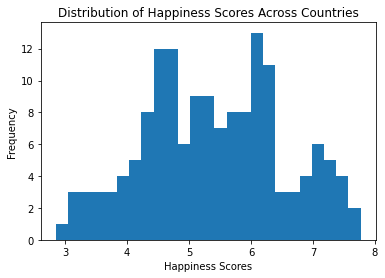

In [25]:
# plotting a histogram of the happiness data
# to get an overview of happiness distribution across all countries

plt.hist(happy_2019['Score'],bins = 25)
plt.title("Distribution of Happiness Scores Across Countries")
plt.xlabel("Happiness Scores")
plt.ylabel("Frequency")

# based on this distribution, the happiness scores across countries 


### Sub-histograms 
To check if the factors that sum up to the happiness weigh differently on COVID-19 outcomes, we created six histograms, one for each subscore.
 
Like the overall happiness score, all six graphs of the subscores do not display a normal distribution. However, their distribution largely varies from that of the happiness score. Three of the six graphs (Social support, Healthy life expectancy and Freedom to make life choices) are skewed to the left, meaning a majority of countries scored similarly and lower on these factors. One graph (perception of corruption)  is skewed to the right. One graph (Generosity) follows somewhat normal distribution, and one graph (GDP per capita) shows a random distribution with peaks at irregular intervals.  


Text(0, 0.5, 'Quantity of Countries')

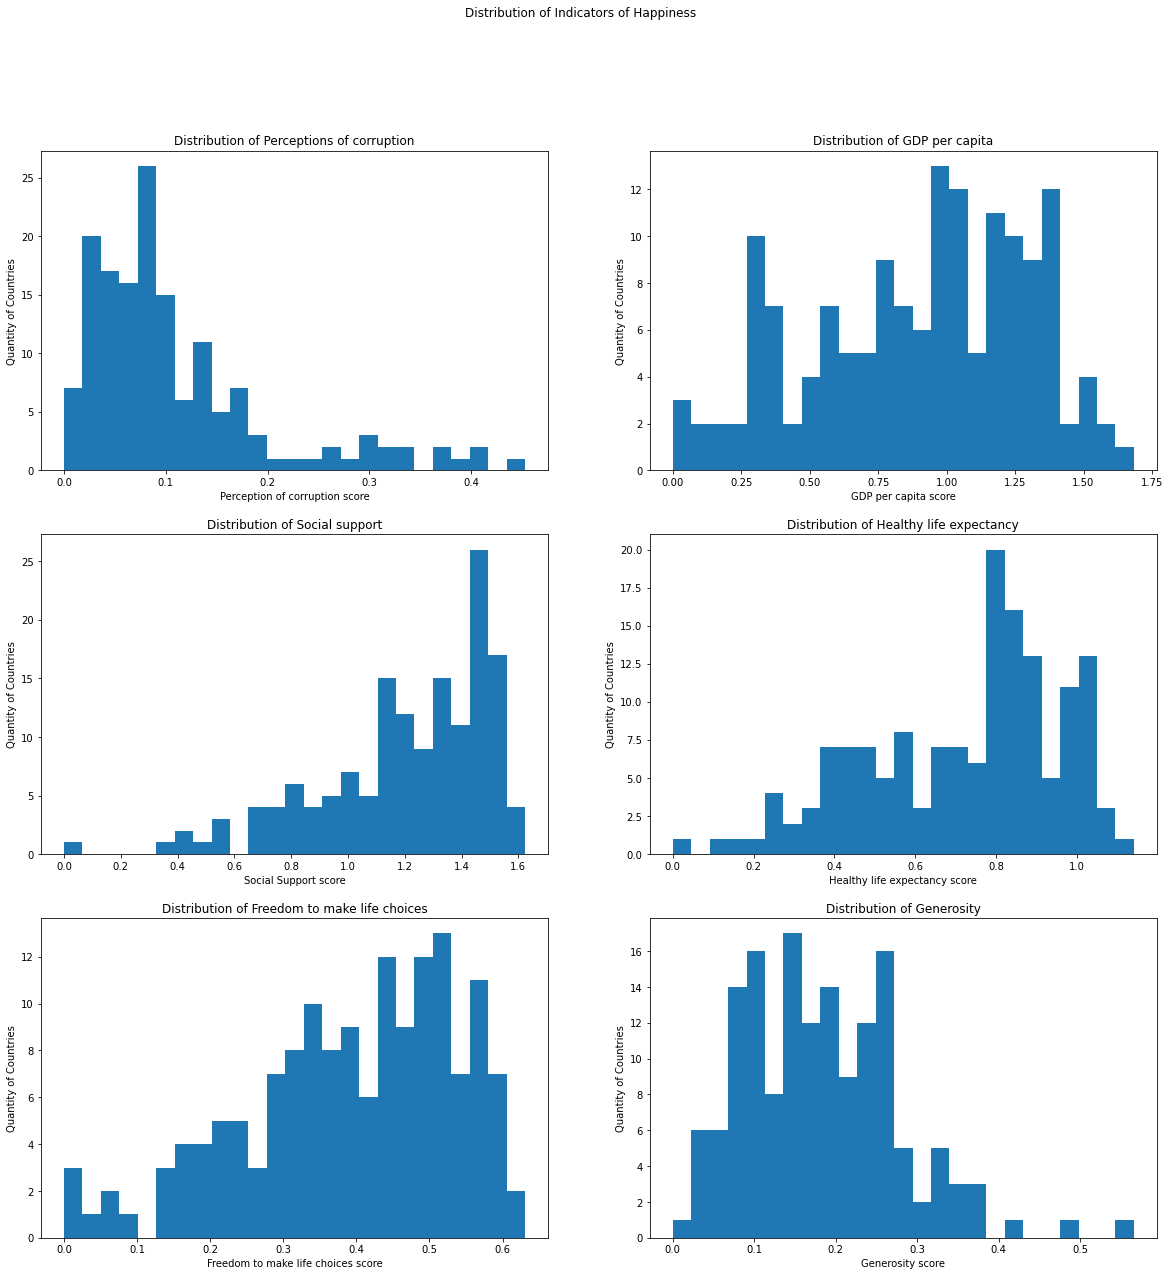

In [26]:
# making histograms for each of the six happiness subscores
# to get a distribution of each of the factors across all countries
fig, axs = plt.subplots(3, 2, figsize=(20,20))

fig.suptitle('Distribution of Indicators of Happiness')

axs[0,0].hist(happy_2019['Perceptions of corruption'], bins=25)
axs[0,1].hist(happy_2019['GDP per capita'],bins=25)
axs[1,0].hist(happy_2019['Social support'],bins=25)
axs[1,1].hist(happy_2019['Healthy life expectancy'],bins=25)
axs[2,0].hist(happy_2019['Freedom to make life choices'],bins=25)
axs[2,1].hist(happy_2019['Generosity'],bins=25)
axs[0, 0].set_title('Distribution of Perceptions of corruption')
axs[0, 1].set_title('Distribution of GDP per capita')
axs[1, 0].set_title('Distribution of Social support')
axs[1, 1].set_title('Distribution of Healthy life expectancy')
axs[2, 0].set_title('Distribution of Freedom to make life choices')
axs[2, 1].set_title('Distribution of Generosity')

axs[0,0].set_xlabel('Perception of corruption score')
axs[0,1].set_xlabel('GDP per capita score')
axs[1,0].set_xlabel('Social Support score')
axs[1,1].set_xlabel('Healthy life expectancy score')
axs[2,0].set_xlabel('Freedom to make life choices score')
axs[2,1].set_xlabel('Generosity score')

axs[0,0].set_ylabel('Quantity of Countries')
axs[0,1].set_ylabel('Quantity of Countries')
axs[1,0].set_ylabel('Quantity of Countries')
axs[1,1].set_ylabel('Quantity of Countries')
axs[2,0].set_ylabel('Quantity of Countries')
axs[2,1].set_ylabel('Quantity of Countries')


# based on these distributions, GDP per capita seems about normally distributed
# the other factors are skewed one way or the other, which means that the majority of countries have similar values for these factors
# and that we need to pay attention to outliers for these values

## Covid Dataset

### Line graphs
To temporally visualize the change in COVID-19 outcomes from January to October 2019, we used the following two line graphs: 
 
(1) the number of cumulative cases, recoveries and death each month
From the graph that represents the cumulative numbers of cases, recoveries and deaths, it can be seen that the cumulative number of cases and recoveries grows exponentially with the cumulative number of confirmed cases rapidly increasing around the third month. The cumulative number of recoveries has a slightly less steep exponential increase which rises slightly later around the sixth month, highlighting that more individuals were getting infected as compared to individuals were recovering. The cumulative number of deaths show a very slight increase over time on a much smaller scale compared to the cumulative confirmed cases and recoveries.


Text(0, 0.5, 'Number of Cases')

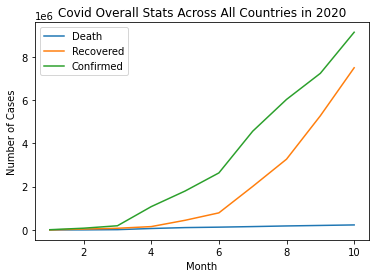

In [27]:
# making a temporary covid dataset to observe how covid cases, deaths, and recoveries increased over time
# grouping by month across all countries

temp = covid_test.copy()
temp["month"] = temp.index.get_level_values(1)
temp=temp.groupby("month").max()
temp['Month'] = temp.index

plt.plot('Month', 'Death', data=temp)
plt.plot('Month', 'Recovered', data = temp)
plt.plot('Month', 'Confirmed', data = temp)
plt.legend()
plt.title("Covid Overall Stats Across All Countries in 2020")
plt.xlabel("Month")
plt.ylabel("Number of Cases")

# we don't see any unexpected dips or spikes; cases rise logarithmically with time

(2) the number of new cases, recoveries and death each month

From this graph, it can be seen that the pattern of new monthly cases, recoveries and deaths drastically differs from the total number of cases, recoveries and deaths. The total number of confirmed cases shows a steady increase over the 10 months of this study, with slightly varying degrees of increase each month. In contrast, the number of new cases shows a slight decline from Months 4–5 but increase across every other month. The number of recoveries shows an interesting pattern. The new recoveries start showing a drastic increase around the 3-month and increases with a steep slope until month 7. The new cases then show a plunge from Month 7–8 and remain around the same till the 9th month, showing only a slight increase. This plunge cannot be accounted to the decrease in number of cases or increased deaths as neither of those numbers fall during this period. One possible explanation during this period can be that people were sick longer during this period due to the prevalence of a stronger strain, however this cannot be confirmed with the given data. Surprisingly, the number of recoveries show a drastic increase during the 10th month which is not followed by a drastic increase in cases or deaths. This supports our assumption that a stronger strain of COVID-19 was prevalent during this period and individuals who were infected during the the 7th/8th/9th month showed a prolonged sick phase and recovered during the 10th month


Text(0, 0.5, 'Number of Cases')

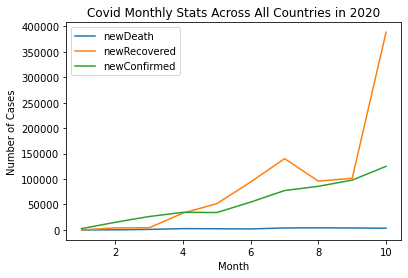

In [28]:
# making a temporary covid dataset to observe how covid cases, deaths, and recoveries increased over time
# grouping by month across all countries

plt.plot('Month', 'newDeath', data=temp)
plt.plot('Month', 'newRecovered', data = temp)
plt.plot('Month', 'newConfirmed', data = temp)
plt.legend()
plt.title("Covid Monthly Stats Across All Countries in 2020")
plt.xlabel("Month")
plt.ylabel("Number of Cases")


### Merged Country and Covid

#### Normalizing COVID-19 data set
To ensure uniformity while drawing a relationship between happiness score and the effect of COVID-19, the total number of COVID-19 cases, recoveries and death for a particular country were divided by the population of the country to obtain the number of cases, deaths and recoveries per capita or percentage of the population. This was done to ensure that the COVID-19 outcomes are not over-exaggerated for countries with high populations and under-represented for countries with small populations.

In [29]:
pop_dens = pop_dens.rename(columns={"Country (or dependency)": "Country"})
combined = pd.merge(covid_oct, pop_dens, on="Country").drop(['newConfirmed', 'newDeath', 'newRecovered'], axis=1)

## normalized based on population
combined["Confirmed_norm"] = np.round(combined["Confirmed"] / combined["Population (2020)"], decimals=4)
combined["Death_norm"] = np.round(combined["Death"] / combined["Population (2020)"], decimals=4)
combined["Recovered_norm"] = np.round(combined["Recovered"] / combined["Population (2020)"], decimals=4)


#### Histograms
To visualize the spread of COVID-19 across countries and see if there is a difference in the pattern of covid’s effect when the data is normalized, we made 2 series of histograms, for one set, the raw data from the COVID-19 database was chosen as the x-axis and for the second set, the normalized data was chosen as the x-axis. The number of countries was chosen as the Y-axis for both sets.


Text(0, 0.5, 'quantity')

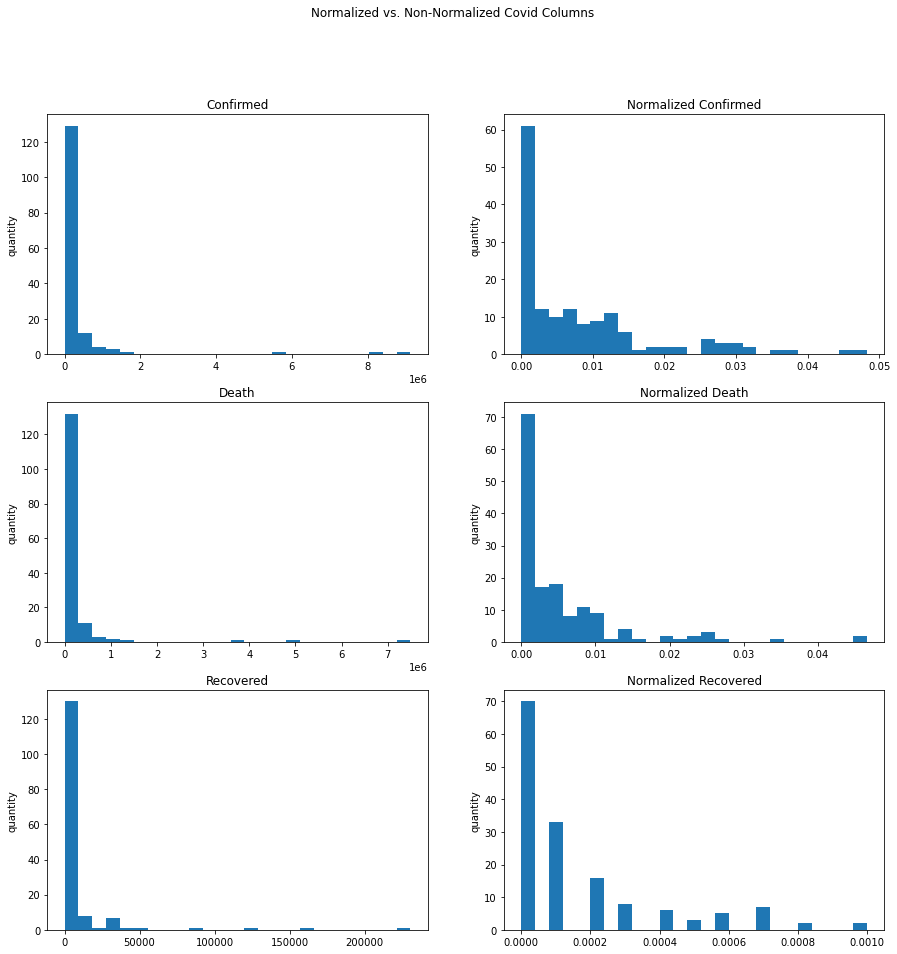

In [30]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))

fig.suptitle('Normalized vs. Non-Normalized Covid Columns')

axs[0,0].hist(combined["Confirmed"], bins=25)
axs[0,1].hist(combined["Confirmed_norm"],bins=25)
axs[1,0].hist(combined["Recovered"],bins=25)
axs[1,1].hist(combined["Recovered_norm"],bins=25)
axs[2,0].hist(combined["Death"],bins=25)
axs[2,1].hist(combined["Death_norm"],bins=25)
axs[0, 0].set_title('Confirmed')
axs[0, 1].set_title('Normalized Confirmed')
axs[1, 0].set_title('Death')
axs[1, 1].set_title('Normalized Death')
axs[2, 0].set_title('Recovered')
axs[2, 1].set_title('Normalized Recovered')

axs[0,0].set_ylabel('quantity')
axs[0,1].set_ylabel('quantity')
axs[1,0].set_ylabel('quantity')
axs[1,1].set_ylabel('quantity')
axs[2,0].set_ylabel('quantity')
axs[2,1].set_ylabel('quantity')

From the histogram, it is evident that normalizing the data gives us a greater spread and variability of data. In general, all three graphs from raw and normalized data are skewed to the right highlighting that the number of countries decreases for higher percentages of cases, deaths and recoveries.


In [31]:
happy_2019 = happy_2019.rename(columns={"Country or region": "Country"})
covid_happy_area = pd.merge(combined, happy_2019, on="Country")
# covid_happy_area

#### Scatterplots
To visualize the spread of COVID-19 cases, deaths and recoveries across countries as a function of the happiness scores, we plotted 3 scatter plots. For all three, the happiness score was chosen as the x-axis. For the y-axis, the normalized values for COVID-19 cases, COVID-19 deaths and recoveries were chosen. 

Text(0, 0.5, 'Covid Recoveries')

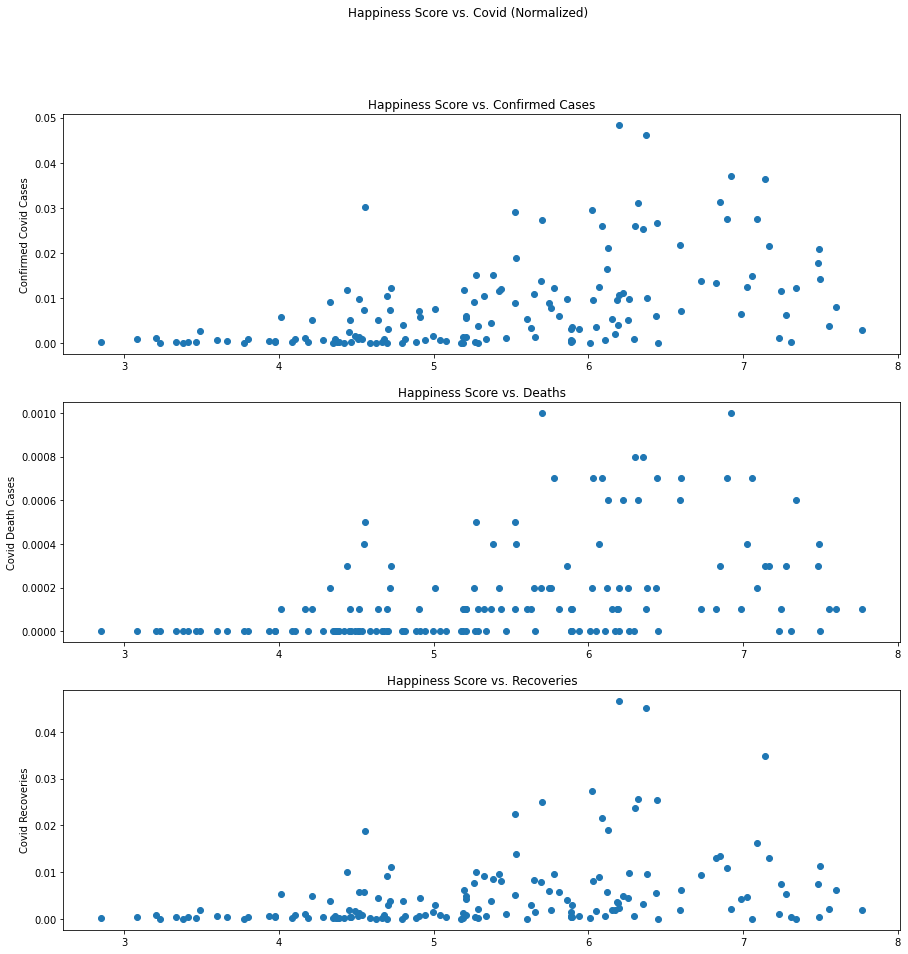

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,15))

fig.suptitle('Happiness Score vs. Covid (Normalized)')

ax1.scatter(covid_happy_area["Score"], covid_happy_area["Confirmed_norm"])
ax1.set_title('Happiness Score vs. Confirmed Cases')
ax1.set_ylabel('Happiness Score')
ax1.set_ylabel('Confirmed Covid Cases')

ax2.scatter(covid_happy_area["Score"], covid_happy_area["Death_norm"])
ax2.set_title('Happiness Score vs. Deaths')
ax2.set_ylabel('Happiness Score')
ax2.set_ylabel('Covid Death Cases')

ax3.scatter(covid_happy_area["Score"], covid_happy_area["Recovered_norm"])
ax3.set_title('Happiness Score vs. Recoveries')
ax3.set_ylabel('Happiness Score')
ax3.set_ylabel('Covid Recoveries')


From the scatterplot, it can be seen that as the happiness score increases, the scatter plot begins to fan out, showing increased variability in percent confirmed covid cases and percent recoveries as happiness scores increases. 
 
Nothing can be confidently said about the scatterplot for percent death and happiness score.

To further visualize the spread of COVID-19 as a function of the factors that make up the happiness score, we plotted another set of scatter plots. The different sub contributors of happiness scores were chosen as the x-axis. For the y axis, the normalized values for COVID-19 cases, COVID-19 deaths and recoveries were chosen.


Text(0, 0.5, 'Covid Recoveries')

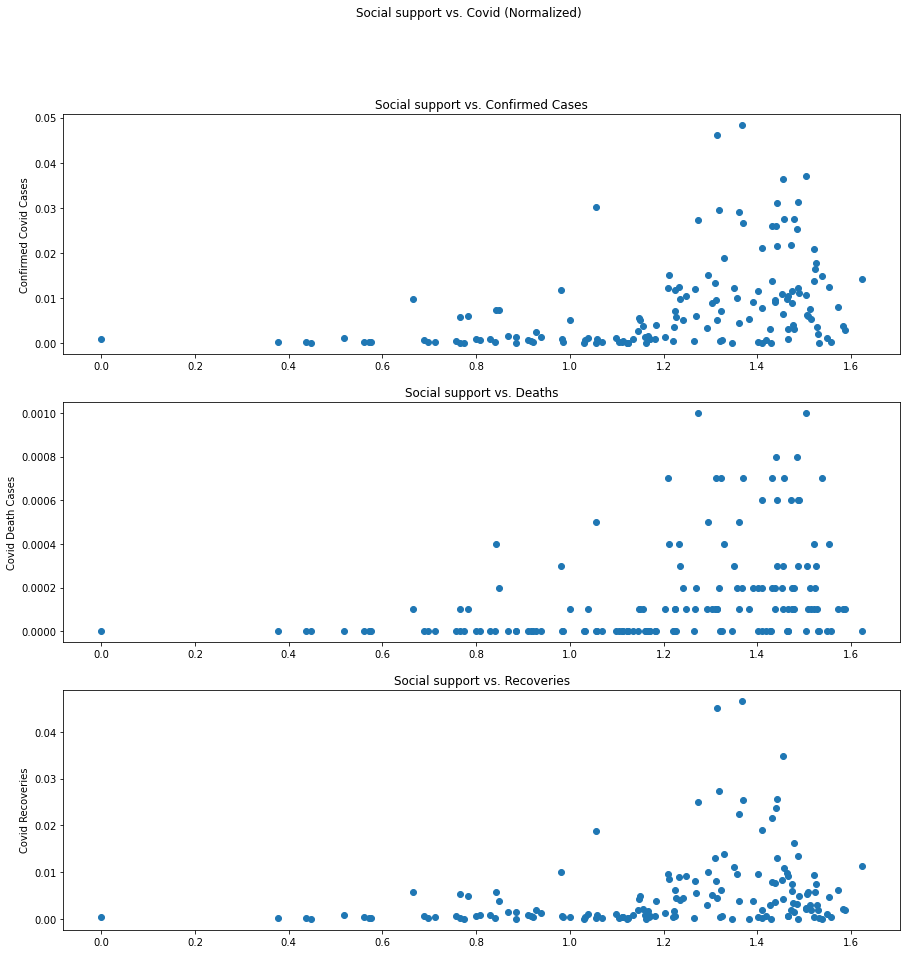

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,15))

fig.suptitle('Social support vs. Covid (Normalized)')

ax1.scatter(covid_happy_area["Social support"], covid_happy_area["Confirmed_norm"])
ax1.set_title('Social support vs. Confirmed Cases')
ax1.set_ylabel('Social support')
ax1.set_ylabel('Confirmed Covid Cases')

ax2.scatter(covid_happy_area["Social support"], covid_happy_area["Death_norm"])
ax2.set_title('Social support vs. Deaths')
ax2.set_ylabel('Healthy life expectancy')
ax2.set_ylabel('Covid Death Cases')

ax3.scatter(covid_happy_area["Social support"], covid_happy_area["Recovered_norm"])
ax3.set_title('Social support vs. Recoveries')
ax3.set_ylabel('Social support')
ax3.set_ylabel('Covid Recoveries')


Text(0, 0.5, 'Covid Recoveries')

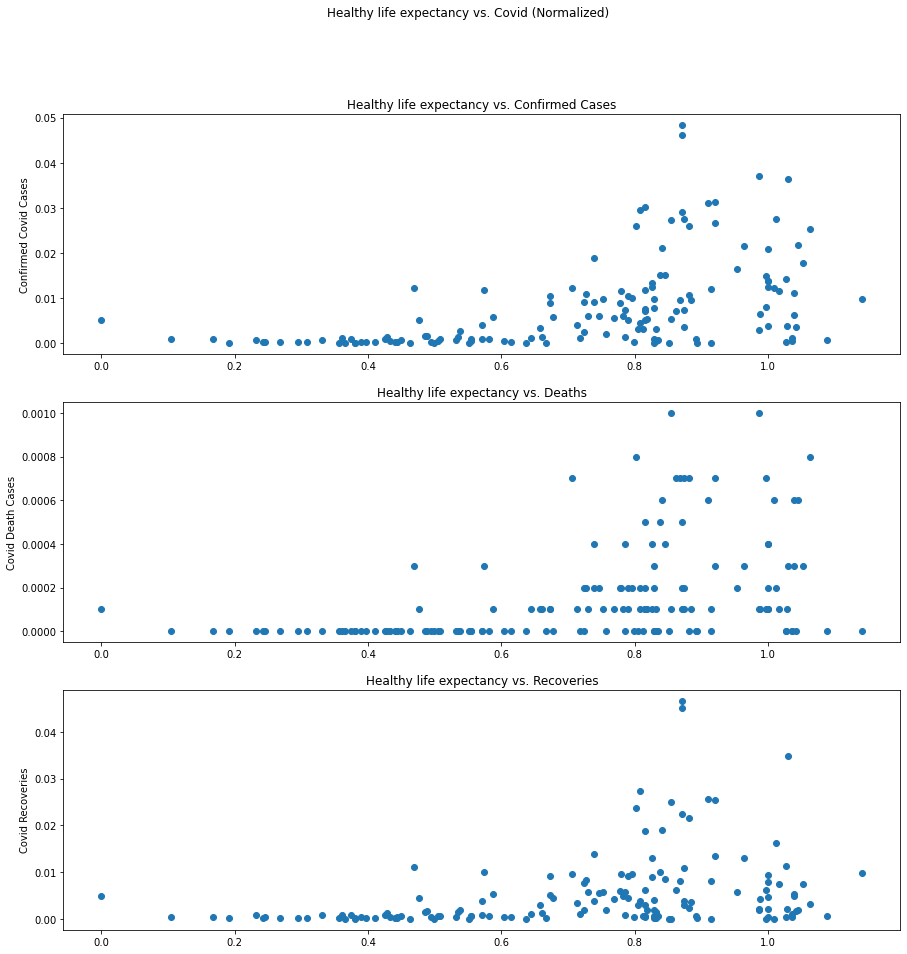

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,15))

fig.suptitle('Healthy life expectancy vs. Covid (Normalized)')

ax1.scatter(covid_happy_area["Healthy life expectancy"], covid_happy_area["Confirmed_norm"])
ax1.set_title('Healthy life expectancy vs. Confirmed Cases')
ax1.set_ylabel('Healthy life expectancy')
ax1.set_ylabel('Confirmed Covid Cases')

ax2.scatter(covid_happy_area["Healthy life expectancy"], covid_happy_area["Death_norm"])
ax2.set_title('Healthy life expectancy vs. Deaths')
ax2.set_ylabel('Healthy life expectancy')
ax2.set_ylabel('Covid Death Cases')

ax3.scatter(covid_happy_area["Healthy life expectancy"], covid_happy_area["Recovered_norm"])
ax3.set_title('Healthy life expectancy vs. Recoveries')
ax3.set_ylabel('Healthy life expectancy')
ax3.set_ylabel('Covid Recoveries')


Text(0, 0.5, 'Covid Recoveries')

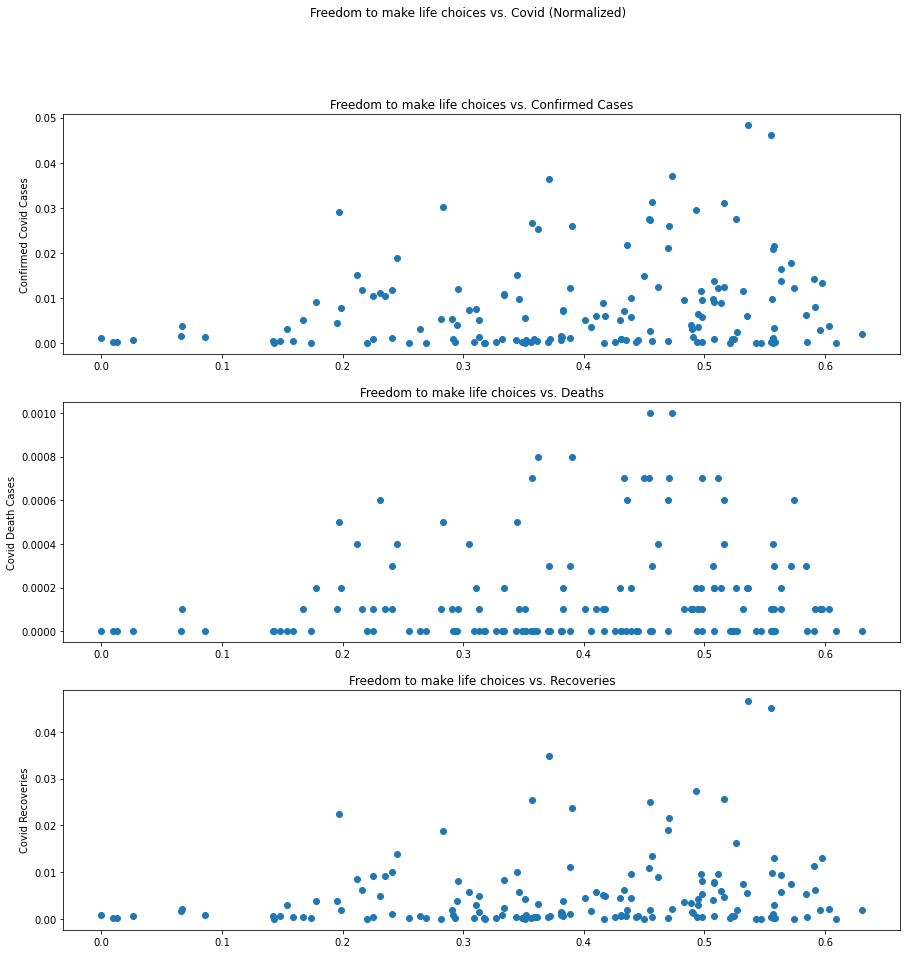

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,15))

fig.suptitle('Freedom to make life choices vs. Covid (Normalized)')

ax1.scatter(covid_happy_area["Freedom to make life choices"], covid_happy_area["Confirmed_norm"])
ax1.set_title('Freedom to make life choices vs. Confirmed Cases')
ax1.set_ylabel('Freedom to make life choices')
ax1.set_ylabel('Confirmed Covid Cases')

ax2.scatter(covid_happy_area["Freedom to make life choices"], covid_happy_area["Death_norm"])
ax2.set_title('Freedom to make life choices vs. Deaths')
ax2.set_ylabel('Freedom to make life choices')
ax2.set_ylabel('Covid Death Cases')

ax3.scatter(covid_happy_area["Freedom to make life choices"], covid_happy_area["Recovered_norm"])
ax3.set_title('Freedom to make life choices vs. Recoveries')
ax3.set_ylabel('Freedom to make life choices')
ax3.set_ylabel('Covid Recoveries')

Text(0, 0.5, 'Covid Recoveries')

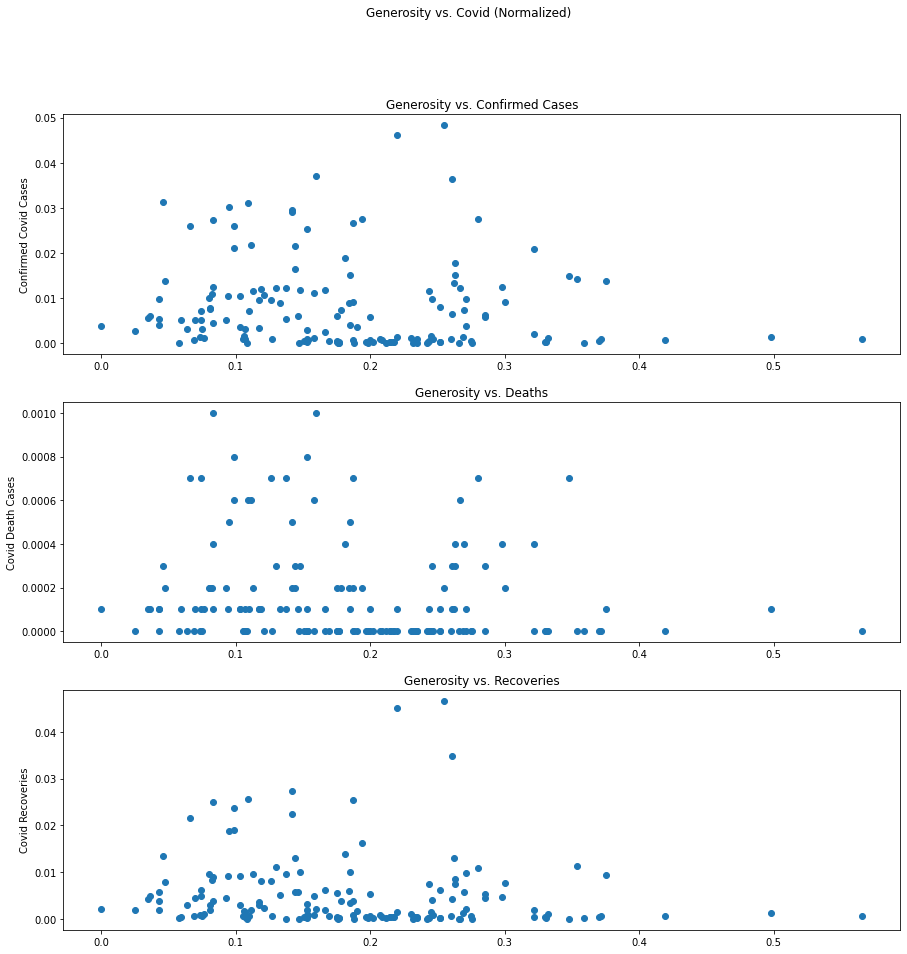

In [36]:

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,15))

fig.suptitle('Generosity vs. Covid (Normalized)')

ax1.scatter(covid_happy_area["Generosity"], covid_happy_area["Confirmed_norm"])
ax1.set_title('Generosity vs. Confirmed Cases')
ax1.set_ylabel('Generosity')
ax1.set_ylabel('Confirmed Covid Cases')

ax2.scatter(covid_happy_area["Generosity"], covid_happy_area["Death_norm"])
ax2.set_title('Generosity vs. Deaths')
ax2.set_ylabel('Generosity')
ax2.set_ylabel('Covid Death Cases')

ax3.scatter(covid_happy_area["Generosity"], covid_happy_area["Recovered_norm"])
ax3.set_title('Generosity vs. Recoveries')
ax3.set_ylabel('Generosity')
ax3.set_ylabel('Covid Recoveries')

Text(0, 0.5, 'Covid Recoveries')

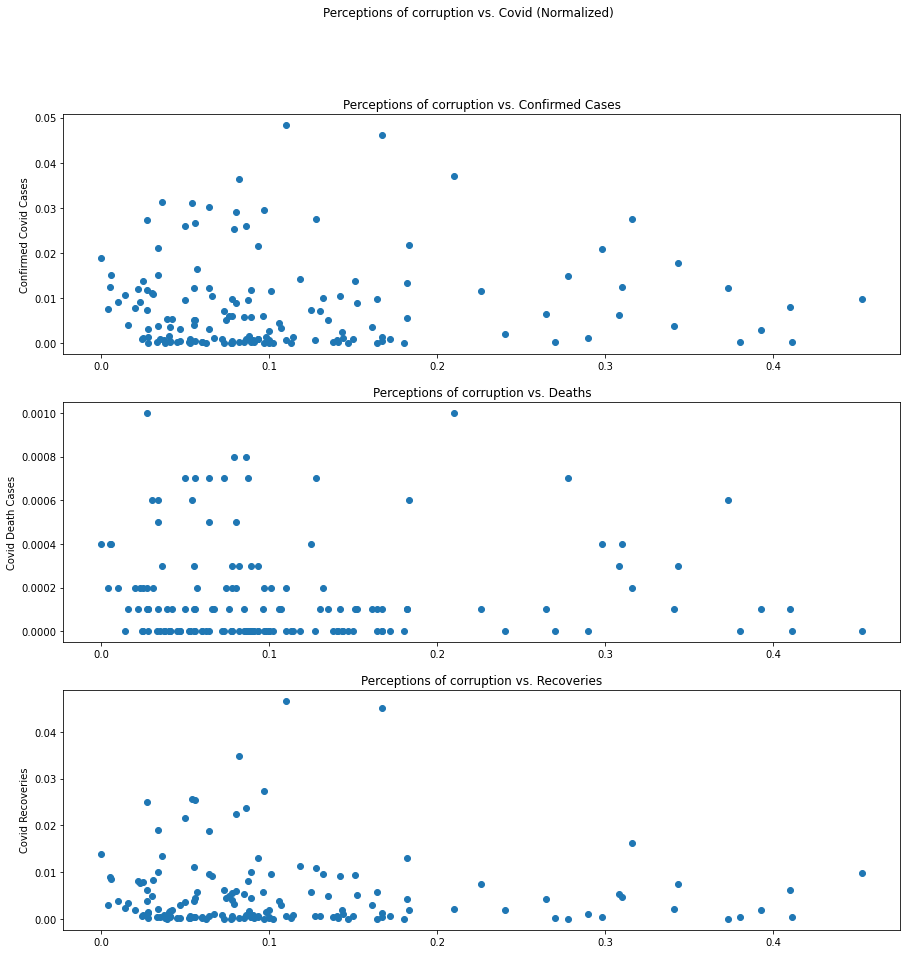

In [37]:
# Perceptions of corruption

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,15))

fig.suptitle('Perceptions of corruption vs. Covid (Normalized)')

ax1.scatter(covid_happy_area["Perceptions of corruption"], covid_happy_area["Confirmed_norm"])
ax1.set_title('Perceptions of corruption vs. Confirmed Cases')
ax1.set_ylabel('Perceptions of corruption')
ax1.set_ylabel('Confirmed Covid Cases')

ax2.scatter(covid_happy_area["Perceptions of corruption"], covid_happy_area["Death_norm"])
ax2.set_title('Perceptions of corruption vs. Deaths')
ax2.set_ylabel('Perceptions of corruption')
ax2.set_ylabel('Covid Death Cases')

ax3.scatter(covid_happy_area["Perceptions of corruption"], covid_happy_area["Recovered_norm"])
ax3.set_title('Perceptions of corruption vs. Recoveries')
ax3.set_ylabel('Perceptions of corruption')
ax3.set_ylabel('Covid Recoveries')

In general, two patterns were seen across the different contributors of happiness and the normalized data. The first pattern was a fanning out pattern with an increase in the happiness subset. As described above, this implies a greater variability in percent cases confirmed and recovered as the happiness subscore increases. This pattern was true for the following subcategories of happiness: Social support, Healthy life expectancy and Freedom to make life choices. The second pattern was a fanning-in pattern with an increase in the happiness subset. This implies a decreased variability in percent cases confirmed and recovered as the happiness subscore increases.
 
Nothing can be confidently said about the scatterplot for percent death and happiness score


# Linear Regression

### Happiness Score vs. Confirmed

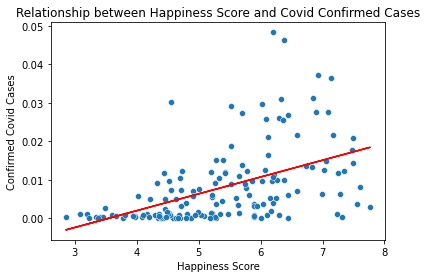

In [38]:
## Happiness Score vs. Confirmed 

ax = sns.scatterplot(x = 'Score', y = 'Confirmed_norm', data = covid_happy_area)
ax.set_title('Relationship between Happiness Score and Covid Confirmed Cases')
plt.xlabel('Happiness Score')
plt.ylabel('Confirmed Covid Cases')

a1, b1 = np.polyfit(covid_happy_area["Score"].values, covid_happy_area["Confirmed_norm"].values, 1)
yfit = [b1 + a1 * xi for xi in covid_happy_area["Score"]]
plt.plot(covid_happy_area["Score"], yfit, 'Red')

In [39]:
outcome, predictors = patsy.dmatrices('Confirmed_norm ~ Score', covid_happy_area)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Confirmed_norm   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     48.41
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.00e-10
Time:                        20:48:36   Log-Likelihood:                 506.85
No. Observations:                 152   AIC:                            -1010.
Df Residuals:                     150   BIC:                            -1004.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0155      0.003     -4.467      0.0

### Happiness Score vs. Death

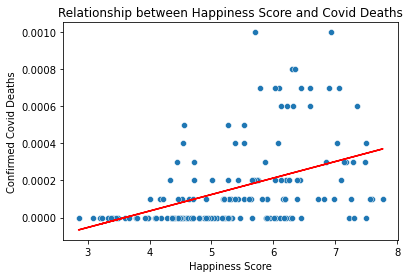

In [40]:
ax = sns.scatterplot(x = 'Score', y = 'Death_norm', data = covid_happy_area)
ax.set_title('Relationship between Happiness Score and Covid Deaths')
plt.xlabel('Happiness Score')
plt.ylabel('Confirmed Covid Deaths')

a1, b1 = np.polyfit(covid_happy_area["Score"].values, covid_happy_area["Death_norm"].values, 1)
yfit = [b1 + a1 * xi for xi in covid_happy_area["Score"]]
plt.plot(covid_happy_area["Score"], yfit, 'Red')

In [41]:
outcome, predictors = patsy.dmatrices('Death_norm ~ Score', covid_happy_area)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Death_norm   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     34.94
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           2.20e-08
Time:                        20:48:37   Log-Likelihood:                 1073.8
No. Observations:                 152   AIC:                            -2144.
Df Residuals:                     150   BIC:                            -2137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0003   8.31e-05     -3.862      0.0

### Happiness Score vs. Recovered

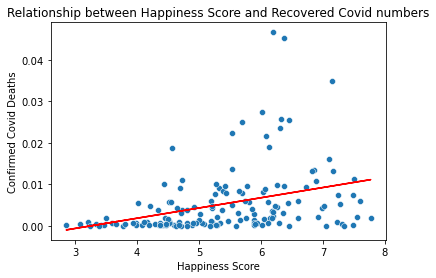

In [42]:
ax = sns.scatterplot(x = 'Score', y = 'Recovered_norm', data = covid_happy_area)
ax.set_title('Relationship between Happiness Score and Recovered Covid numbers')
plt.xlabel('Happiness Score')
plt.ylabel('Confirmed Covid Deaths')

a1, b1 = np.polyfit(covid_happy_area["Score"].values, covid_happy_area["Recovered_norm"].values, 1)
yfit = [b1 + a1 * xi for xi in covid_happy_area["Score"]]
plt.plot(covid_happy_area["Score"], yfit, 'Red')

In [43]:
outcome, predictors = patsy.dmatrices('Recovered_norm ~ Score', covid_happy_area)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Recovered_norm   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     20.50
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.21e-05
Time:                        20:48:37   Log-Likelihood:                 528.63
No. Observations:                 152   AIC:                            -1053.
Df Residuals:                     150   BIC:                            -1047.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0080      0.003     -2.663      0.0

# Conclusion & Discussion:
There is a statistically significant (p<0.05), weak positive correlation between levels of perceived happiness and increase in percent covid cases. Our linear regression shows that for each unit increase in happiness there is a 0.44% increase in COVID-19 cases. It also shows that for each unit increase in happiness there is a 0.25% increase in COVID-19 recoveries. However, the relationship between units of happiness and COVID-19 deaths is too exponentially small to consider. Further, the predictive value of our analysis was low, and therefore any conclusion we make does not hold a lot of weight. This means that our hypothesis of higher perceived happiness correlating with mitigated adverse effects of COVID-19 was wrong, as the happier countries on average have slightly higher percent of COVID-19 cases. The happier countries have a slightly higher percent of COVID-19 recoveries which can be accounted by the slightly higher increase in percent cases and does not give us any information about the impact of COVID-19.
 
There are quite a few limitations in our analysis. For instance, we only analyzed the total number of reported cases, deaths, and recoveries through October, so we did not look at how countries were faring throughout the time course of the pandemic in detail. Also, our analysis relied on reported data that the COVID-19 database we used had compiled, we do not know how accurately each country reports data. For example, we could not control for differences between availability of COVID-19 testing across countries.
 
Of the factors we compared, happiness was most strongly correlated, with the best predictive value to confirmed COVID-19 cases. Happiness and its subsets could potentially have played a role in COVID-19 outcomes to an extent. 